<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [137]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O  dataset é uma amostra aleatória de tamanho 321 de imóveis disponíveis para venda no município de Rio Grande - RS.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Tipo</b> - Se é casa ou apartamento </li>
    <li><b>Bairro</b> - Qual bairro pertence </li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Quartos</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Vaga</b> - Quantidade de Vagas</li>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
</ul>


## Leitura dos dados

In [138]:
dados = pd.read_csv('./imobiliaria_lindalvo_dados_unidos_321 - TESTEEE.csv', sep=',')

## Visualizar os dados

In [139]:
dados .head()

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.0,850000.0
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.0,1200000.0
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.0,1060000.0
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.0,320000.0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.0,450000.0


## Verificando o tamanho do dataset

In [140]:
dados.shape

(477, 10)

## Convertendo  Object para número

In [141]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Card             321 non-null    object 
 1   Tipo             477 non-null    object 
 2   Cidade           477 non-null    object 
 3   Bairro           477 non-null    object 
 4   Dormitorios      477 non-null    int64  
 5   Suites           477 non-null    int64  
 6   Banheiros        477 non-null    int64  
 7   Vagas            477 non-null    int64  
 8   Area_construida  477 non-null    float64
 9   Valor            474 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 37.4+ KB


In [142]:
dados.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area_construida', 'Valor'],
      dtype='object')

In [143]:
dados['Area_construida'].unique()

array([250.  , 380.  , 140.  , 172.  ,  68.  , 110.  , 125.  ,  90.  ,
        92.  , 230.  , 120.  , 220.  ,  76.  , 101.  , 200.  , 171.  ,
       130.  ,   1.  , 400.  , 180.  , 198.  , 315.  , 280.  , 282.  ,
       240.  , 100.  , 350.  , 377.  , 270.  , 190.  ,  98.  , 160.  ,
        85.  , 485.  ,  74.  , 164.  , 114.  ,  64.  , 150.  ,  84.  ,
       292.  , 305.  , 175.  , 202.  , 162.  , 235.  ,  65.  , 170.  ,
       420.  ,  80.  , 223.  ,   0.  ,   2.  , 185.  ,  55.  , 300.  ,
        75.  , 126.  ,  57.  , 260.  ,  94.  ,  60.  ,  50.  ,  59.  ,
       569.  ,  51.  , 178.  ,  87.  , 335.  , 107.  ,  70.  ,  52.  ,
        47.  , 104.  ,  77.  ,  48.  ,  45.  ,  96.  , 473.  ,  72.  ,
       122.  , 201.  ,  62.  ,  69.  , 500.  , 145.  ,  54.  ,  20.  ,
       134.  , 259.  ,  36.  ,  56.  , 169.  ,  43.  ,  42.  , 102.  ,
        53.  ,  46.  ,  71.  ,  38.  , 225.  ,  40.  , 112.  ,  58.  ,
       330.  , 480.  ,  82.  , 146.  , 278.5 ,  37.4 ,  47.2 ,  64.11,
      

In [144]:
dados['Dormitorios'] = dados['Dormitorios'].astype('int')
dados['Suites'] = dados['Suites'].astype('int')
dados['Banheiros'] = dados['Banheiros'].astype('int')
dados['Vagas'] = dados['Vagas'].astype('int')
dados['Area_construida'] = dados['Area_construida'].astype('float64')

In [145]:
dados['Valor'].unique()

array([ 850000., 1200000., 1060000.,  320000.,  450000.,  380000.,
        520000.,  275000.,  265000.,  350000.,  420000.,  430000.,
        370000.,  550000.,  426000.,  200000.,  700000.,  400000.,
       1100000., 1431000.,  250000.,  605000., 1500000., 1600000.,
        900000.,  500000.,  360000., 1400000.,  286200., 1300000.,
        340000.,  180000.,  366000.,  230000.,  300000., 1280000.,
        650000.,  170000.,  490000.,  295000., 1000000.,  945000.,
        424000.,  820000.,  480000.,  580000.,  590000.,  750000.,
        210000.,  290000.,  298000.,  403000.,  271000.,  165000.,
        212000.,  135000.,  220000.,   96000.,  150000.,   80000.,
        280000.,  190000.,  530000.,  115000.,  130000.,  100000.,
        742000.,  315000.,  330000.,  149900.,  137000.,  460000.,
        270000.,  390000.,  690000.,  179000.,  235000.,   85000.,
        160000.,  117000.,  371000.,  240000., 1450000.,  120000.,
        195000.,  720000.,  125000.,  255000.,  495000.,  1378

In [146]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Card             321 non-null    object 
 1   Tipo             477 non-null    object 
 2   Cidade           477 non-null    object 
 3   Bairro           477 non-null    object 
 4   Dormitorios      477 non-null    int32  
 5   Suites           477 non-null    int32  
 6   Banheiros        477 non-null    int32  
 7   Vagas            477 non-null    int32  
 8   Area_construida  477 non-null    float64
 9   Valor            474 non-null    float64
dtypes: float64(2), int32(4), object(4)
memory usage: 29.9+ KB


In [147]:
dados['Valor'].dropna()

0       850000.0
1      1200000.0
2      1060000.0
3       320000.0
4       450000.0
         ...    
471     745000.0
472     780000.0
473     850000.0
474     850000.0
475      96000.0
Name: Valor, Length: 474, dtype: float64

In [148]:
dados.head()

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.0,850000.0
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.0,1200000.0
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.0,1060000.0
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.0,320000.0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.0,450000.0


## Renomeando as colunas

In [149]:
dados.columns = ['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites', 'Banheiros', 'Vagas', 'Area_construida', 'Valor']
dados

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.00,850000.0
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.00,1200000.0
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.00,1060000.0
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.00,320000.0
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.00,450000.0
...,...,...,...,...,...,...,...,...,...,...
472,NaN,Apartamento,Rio Grande,Cassino,3,2,1,1,107.08,780000.0
473,NaN,Casa,Rio Grande,Cassino,4,1,3,5,230.00,850000.0
474,NaN,Casa,Rio Grande,Parque Residencial Salgado Filho,4,1,3,4,350.00,850000.0
475,NaN,Apartamento,Rio Grande,Cidade Nova,1,0,1,0,45.00,96000.0


## Salvando os dados unidos

In [150]:
dados.to_csv('./imobiliaria_lindalvo_dados_unidos_SALVANDO_O_TESTE', index = False, sep = ',')

## Nome dos bairros

In [151]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Vila Nossa Senhora dos Navegantes', 'Parque Residencial Coelho',
       'Senandes', 'Quinta', 'Parque Guanabara', 'Getúlio Vargas',
       'Parque Residencial Jardim do Sol', 'Areal', 'Vila São Miguel',
       'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz', 'Zona Portuária',
       'Vila Santa Rosa', 'Frederico Ernesto Buchholz', 'São Paulo',
       'Vila Nossa Senhora de Fátima', 'Vila da Quinta', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Senandes',
       'Vila Junção', 'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II', 'Simões Lopes', 'Laranjal'], dtype=object)

### Arrumando Nossa Senhora dos Navegantes 

In [152]:
dados['Bairro'].replace('Vila Nossa Senhora dos Navegantes', 'Nossa Senhora dos Navegantes', inplace = True)

In [153]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Parque Guanabara', 'Getúlio Vargas',
       'Parque Residencial Jardim do Sol', 'Areal', 'Vila São Miguel',
       'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz', 'Zona Portuária',
       'Vila Santa Rosa', 'Frederico Ernesto Buchholz', 'São Paulo',
       'Vila Nossa Senhora de Fátima', 'Vila da Quinta', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Senandes',
       'Vila Junção', 'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II', 'Simões Lopes', 'Laranjal'], dtype=object)

### Procurando Parque Guanabara

In [154]:
dados.query('Bairro == "Parque Guanabara"')
dados['Bairro'].replace('Parque Guanabara', 'Cassino', inplace = True)

In [155]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol', 'Areal',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila da Quinta',
       'Vila São João', 'América', 'Vila Maria', 'Castelo Branco',
       'Vila Senandes', 'Vila Junção', 'Parque Marinha',
       'Parque Residencial São Pedro', 'Sitio Santa Cruz', 'Lagoa',
       'Distrito Domingos Petroline', 'COHAB II', 'Simões Lopes',
       'Laranjal'], dtype=object)

### Procurando Areal

In [156]:
## É em Pelotas e não Rio Grande
dados.query('Bairro == "Areal"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
83,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Areal,3,2,1,2,140.0,550000.0


In [157]:
dados.drop(83, axis = 0, inplace = True)

In [158]:
dados.query('Bairro == "Areal"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor


### Procurando Frederico Ernesto Buchholz

In [159]:
dados.query('Bairro == "Frederico Ernesto Buchholz"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
121,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Frederico Ernesto Buchholz,3,0,2,4,178.0,212000.0
177,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Frederico Ernesto Buchholz,2,0,1,1,69.0,240000.0


### Arrumando  Quinta

In [160]:
dados.query('Bairro == "Vila da Quinta"')
dados['Bairro'].replace('Vila da Quinta', 'Quinta', inplace = True)

In [161]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Senandes',
       'Vila Junção', 'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II', 'Simões Lopes', 'Laranjal'], dtype=object)

### Arrumando o bairro Senandes

In [162]:
dados.query('Bairro == "Vila Senandes"')
dados['Bairro'].replace('Vila Senandes', 'Senandes', inplace = True)

In [163]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Junção',
       'Parque Marinha', 'Parque Residencial São Pedro',
       'Sitio Santa Cruz', 'Lagoa', 'Distrito Domingos Petroline',
       'COHAB II', 'Simões Lopes', 'Laranjal'], dtype=object)

### Procurando Sítio Santa Cruz

In [164]:
dados.query('Bairro == "Sitio Santa Cruz"')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
215,https://www.lindalvoimoveis.com.br/imovel/otim...,Casa,Rio Grande,Sitio Santa Cruz,3,0,1,2,150.0,275000.0


In [165]:
dados['Bairro'].replace('Sitio Santa Cruz', 'Quinta', inplace = True)

In [166]:
dados.Bairro.unique()

array(['Cassino', 'Centro', 'Miguel de Castro Moreira', 'Bolaxa',
       'Parque Residencial Salgado Filho', 'Cidade Nova',
       'Vila Maria José', 'Nossa Senhora dos Navegantes',
       'Parque Residencial Coelho', 'Senandes', 'Quinta',
       'Getúlio Vargas', 'Parque Residencial Jardim do Sol',
       'Vila São Miguel', 'Vila Hidráulica', 'Lar Gaúcho', 'Vila Braz',
       'Zona Portuária', 'Vila Santa Rosa', 'Frederico Ernesto Buchholz',
       'São Paulo', 'Vila Nossa Senhora de Fátima', 'Vila São João',
       'América', 'Vila Maria', 'Castelo Branco', 'Vila Junção',
       'Parque Marinha', 'Parque Residencial São Pedro', 'Lagoa',
       'Distrito Domingos Petroline', 'COHAB II', 'Simões Lopes',
       'Laranjal'], dtype=object)

### Procurando bairro Lagoa

In [167]:
dados.query('Bairro == "Lagoa"')
# esta certo

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
256,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento duplex,Rio Grande,Lagoa,2,1,1,0,185.0,350000.0
416,NaN,Apartamento,Rio Grande,Lagoa,2,0,1,0,112.0,300000.0


# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [168]:
dados.describe().round(2)

,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
count,476.00,476.00,476.00,476.00,476.00,473.00
mean,2.58,0.38,1.59,1.78,125.46,353293.00
std,1.12,0.64,1.02,2.14,92.66,267193.59
min,1.00,0.00,1.00,0.00,0.00,80000.00
25%,2.00,0.00,1.00,0.00,60.00,180000.00
50%,2.00,0.00,1.00,1.00,95.00,275000.00
75%,3.00,1.00,2.00,2.00,169.25,424000.00
max,13.00,4.00,11.00,17.00,569.00,1600000.00


### Verificar dados ausentes

In [169]:
dados.isnull().sum()

Card               156
Tipo                 0
Cidade               0
Bairro               0
Dormitorios          0
Suites               0
Banheiros            0
Vagas                0
Area_construida      0
Valor                3
dtype: int64

In [170]:
dados.dropna(subset = ['Valor'], inplace = True)

In [171]:
dados.shape

(473, 10)

### Analisar a area construida

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Respeitando as especificações minimas de unidades habitacionais 

In [172]:
dados.query('Area_construida < = 36')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
18,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Cassino,5,2,4,3,1.0,700000.0
85,https://www.lindalvoimoveis.com.br/imovel/chac...,Chácara,Rio Grande,Quinta,3,1,2,1,0.0,750000.0
90,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,4,2.0,340000.0
125,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,1,0,1,3,1.0,320000.0
129,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,0,3,6,1.0,742000.0
147,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,0,1,3,1.0,270000.0
159,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Bolaxa,3,0,2,6,1.0,85000.0
189,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Getúlio Vargas,2,0,1,1,20.0,180000.0
228,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,2,0,1,2,36.0,320000.0


In [173]:
dados_respeitando_area_minima = dados.query('Area_construida > = 36.0 ')

In [174]:
dados_respeitando_area_minima.shape

(465, 10)

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Retirando os imóveis com uma área miníma menor que 36 m², teremos ao todo 311 imóveis.

In [175]:
dados_respeitando_area_minima.describe().round(2)

,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
count,465.00,465.00,465.00,465.00,465.00,465.00
mean,2.57,0.37,1.59,1.74,127.09,352087.29
std,1.12,0.63,1.02,2.14,91.45,267320.82
min,1.00,0.00,1.00,0.00,36.00,80000.00
25%,2.00,0.00,1.00,0.00,60.00,180000.00
50%,2.00,0.00,1.00,1.00,98.00,275000.00
75%,3.00,1.00,2.00,2.00,170.00,424000.00
max,13.00,4.00,11.00,17.00,569.00,1600000.00


In [176]:
dados_respeitando_area_minima.query('Area_construida == 569.00')

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
115,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,6,0,2,2,569.0,580000.0


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [177]:
dados_respeitando_area_minima.corr().round(4)

,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor
Dormitorios,1.0000,0.3369,0.5809,0.2200,0.5782,0.4300
Suites,0.3369,1.0000,0.2905,0.2045,0.4211,0.5262
Banheiros,0.5809,0.2905,1.0000,0.2746,0.5099,0.4075
Vagas,0.2200,0.2045,0.2746,1.0000,0.3846,0.3673
Area_construida,0.5782,0.4211,0.5099,0.3846,1.0000,0.7077
Valor,0.4300,0.5262,0.4075,0.3673,0.7077,1.0000



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    O objetivo aqui é ver a correlação entre as variáveis e a direção desta correlação.<br>
    A linha/coluna de interesse é do valor, pois ele é a variável dependente, pois queremos um sistema de avaliação imobiliário e ela será o nosso <b>Y </b> pois queremos estimar o valor dos imóveis. Algo importante que precisamos examinar é se as variáveis explicativas não estão muito correlacionadas entre si. Isso pode ser um problema pois são explicativas do mesmo fenômeno, é como se estivesse colocando mais do mesmo.</p>

# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [178]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [179]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

## Box plot da variável *dependente* (y)

<img width='700px' src='../img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Valor (reais)'>

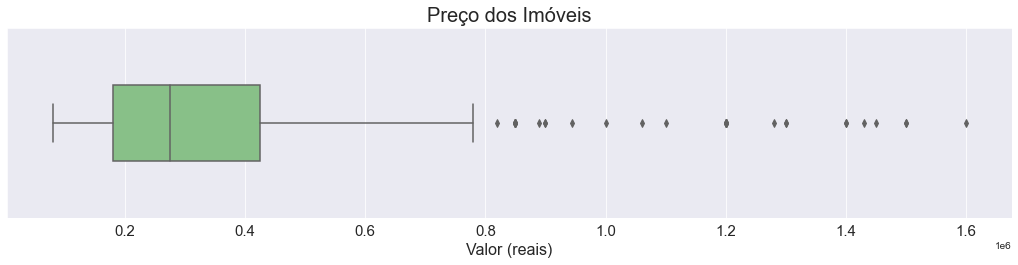

In [180]:
ax = sns.boxplot(x = 'Valor', data=dados_respeitando_area_minima, width= 0.4)
ax.figure.set_size_inches(18, 3.5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Valor (reais)', fontsize=16)
ax.tick_params(labelsize=15)
ax


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    É possivel notar uma assimetria a direita, porém é comum esse tipo de comportamento para esse tipo de variável, temos uma concentração muito grande de valores pequenos.</p>

<AxesSubplot:title={'center':'Preço dos Imóveis por Bairro'}, xlabel='Valor (reais)', ylabel='Bairros'>

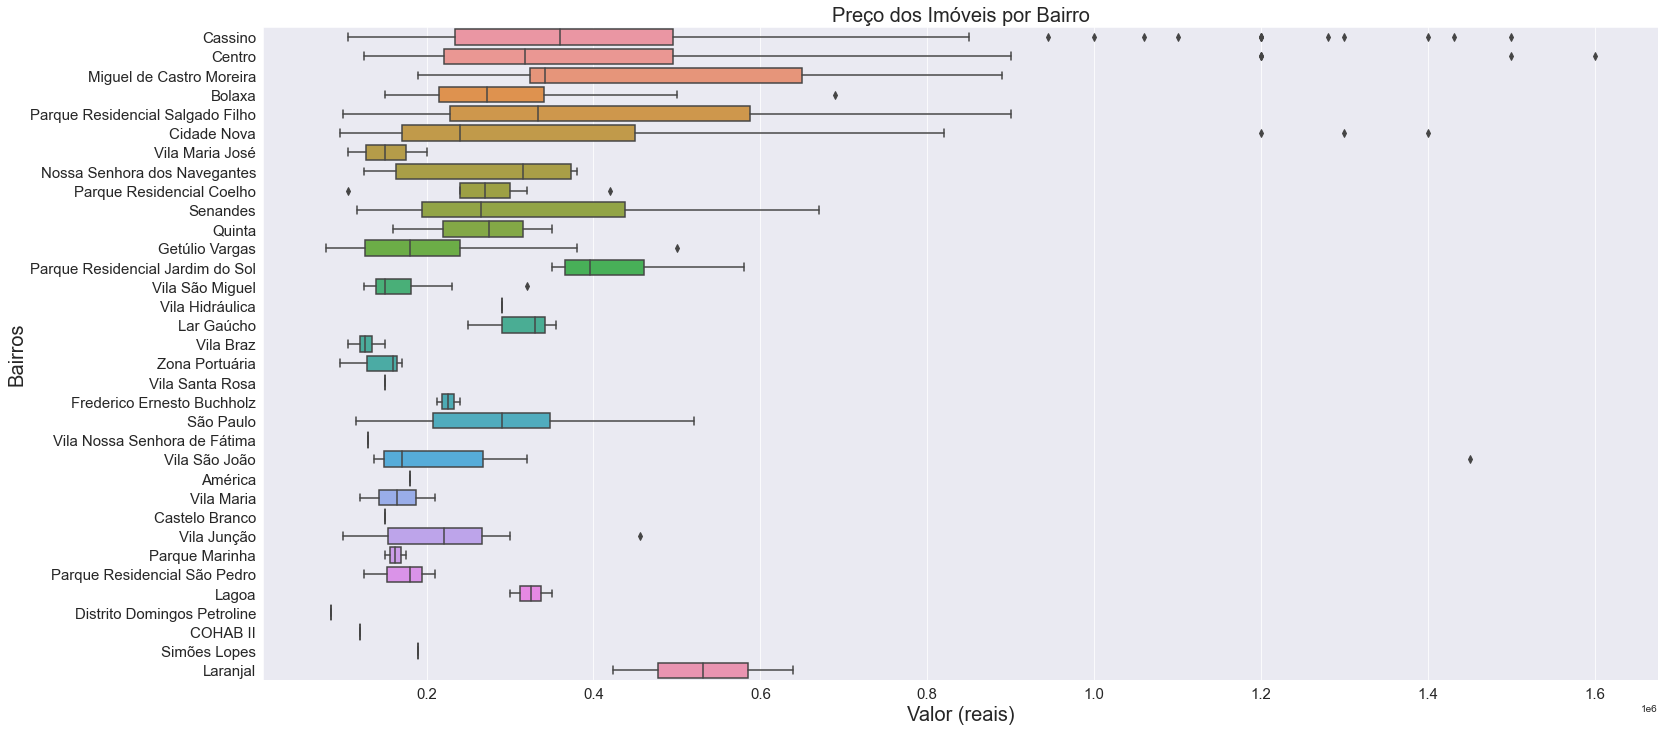

In [181]:
ax = sns.boxplot(x = 'Valor', y='Bairro', data=dados_respeitando_area_minima)
ax.figure.set_size_inches(25, 12)
ax.set_title('Preço dos Imóveis por Bairro', fontsize=20)
ax.set_xlabel('Valor (reais)', fontsize=20)
ax.set_ylabel('Bairros', fontsize=20)
ax.tick_params(labelsize=15)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Densidade'>

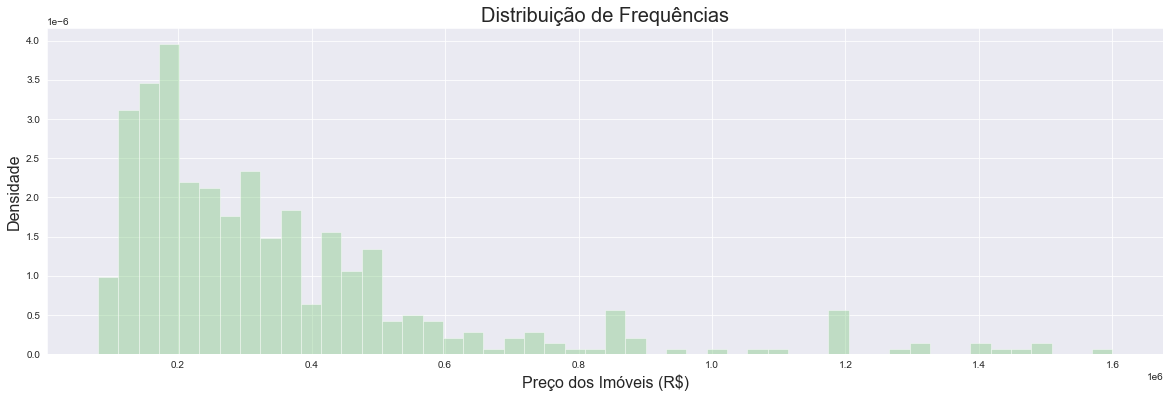

In [182]:
ax = sns.distplot(x = dados_respeitando_area_minima['Valor'], kde = False, bins = 50, norm_hist= True)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax

<img width='800px' src='../img/Box-Plot II.png'>

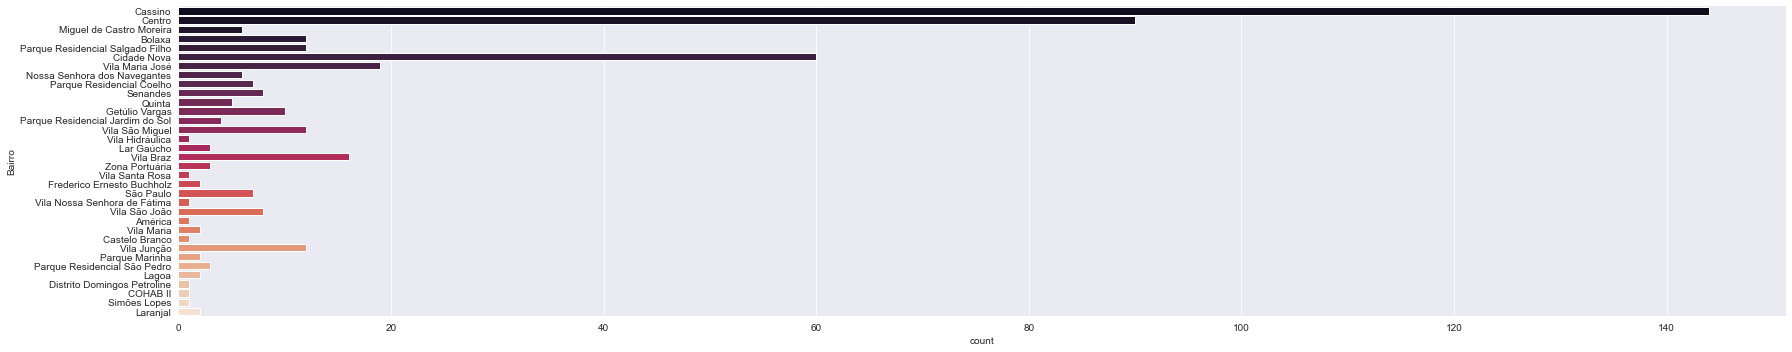

In [183]:
ax = sns.catplot(y = 'Bairro', kind = 'count', data = dados_respeitando_area_minima, aspect = 5, palette = 'rocket')




In [184]:
filtro = dados_respeitando_area_minima.groupby('Bairro').count()['Tipo'].to_frame()
filtro.rename(columns = {'Tipo' : 'Frequência'})

,Frequência
Bairro,
América,1
Bolaxa,12
COHAB II,1
Cassino,144
Castelo Branco,1
Centro,90
Cidade Nova,60
Distrito Domingos Petroline,1
Frederico Ernesto Buchholz,2


# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset. Veremos se a variável dependente com as variáveis explicativas tem alguma relação linear.
<b>y_vars</b> será a variável depedente e <b>x_vars</b> será a lista com as variáveis independentes. utilizei apenas area pois os outros valores são numeros inteiros. (rever)</p>

In [185]:
dados_respeitando_area_minima.columns

Index(['Card', 'Tipo', 'Cidade', 'Bairro', 'Dormitorios', 'Suites',
       'Banheiros', 'Vagas', 'Area_construida', 'Valor'],
      dtype='object')

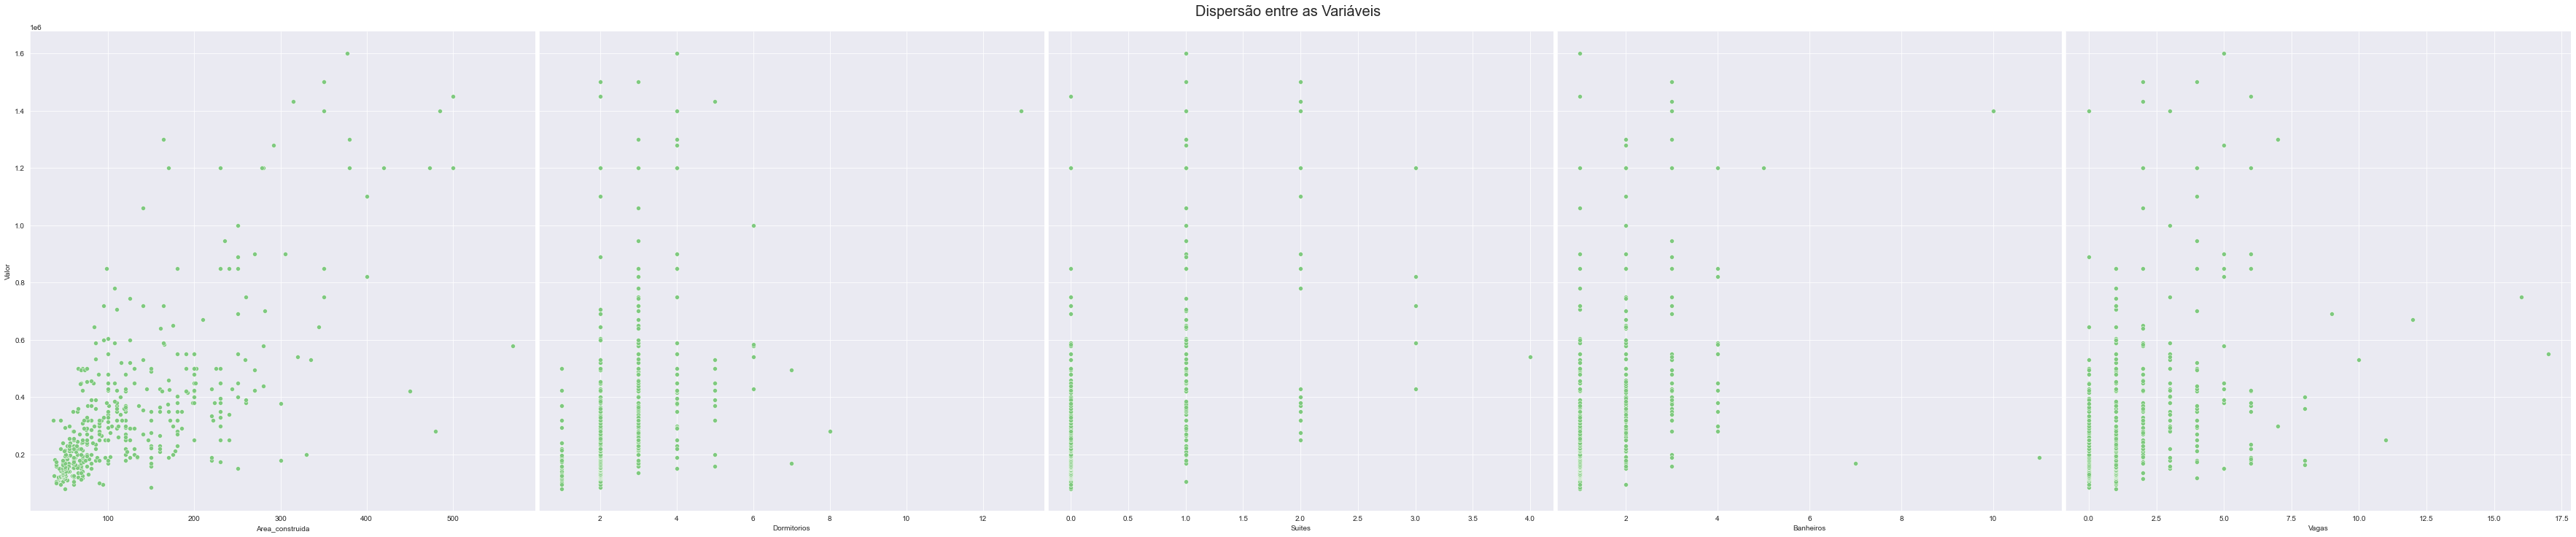

In [186]:
ax = sns.pairplot(dados_respeitando_area_minima, y_vars= 'Valor', x_vars=['Area_construida','Dormitorios', 'Suites', 'Banheiros', 'Vagas'], height= 10)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y= 1.02)
ax

## Com a reta de regressão

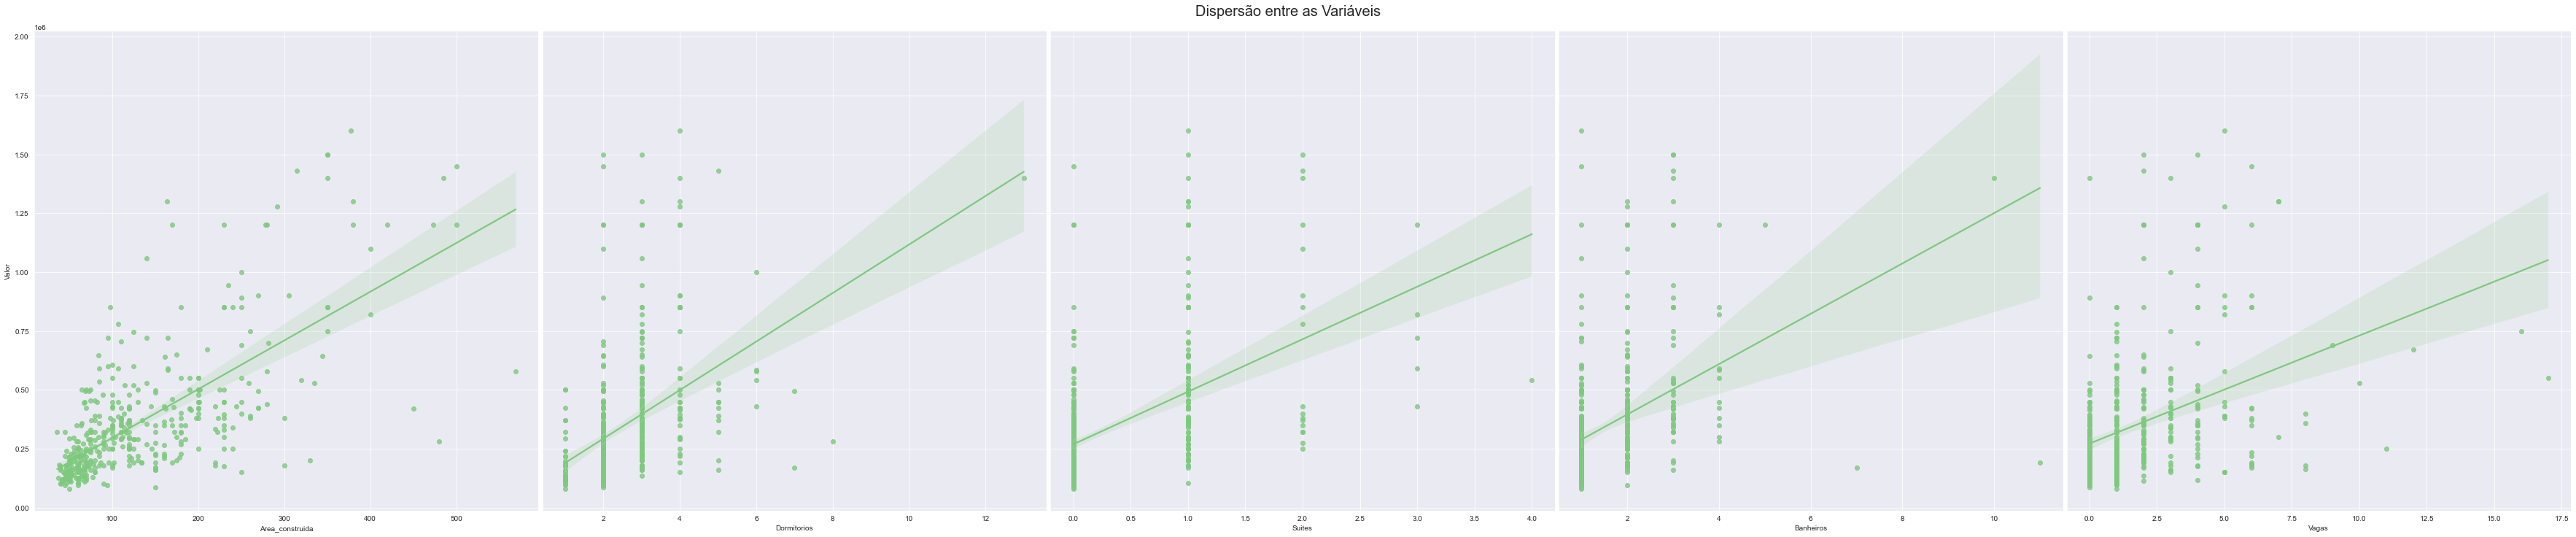

In [187]:
ax = sns.pairplot(dados_respeitando_area_minima, y_vars= 'Valor', x_vars=['Area_construida','Dormitorios', 'Suites', 'Banheiros', 'Vagas'], height= 10, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y= 1.02)
ax

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Na relação entre a variável dependente e explicativas, não conseguimos identificar muito bem uma relação linear entre elas, apenas em 36m² a 100m² mais ou menos. Será feita uma transformação da variável para tentar corrigir o problema e talvez conseguir traçar uma reta de regressão linear para essa base de dados. </p>

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Há duas razões para que transformações como esta sejam aplicadas aos dados: Uma estatística e uma proporcional.<br> <b>A primeira:</b> Supondo que a distribuição da variável em questão possui um viés, ou seja, uma das extremidades elevadas e uma cauda longa, medidas como correlação ou regressão podem ser bastante influenciadas pelo pico da distribuição, outliers, dentre outros. A aplicação da transformação pode reduzir o efeito do viés.<br> <b>A segunda:</b> Alguns conceitos são melhor compreendidos quando tratamos sobre a proporção dos objetos do que sobre a diferença entre eles. Suponha duas empresas, Lindo Olhar e Burguer King, de portes pequeno e muito grande, respectivamente. Lindo Olhar possui um faturamento diário de alguns milhares de reais por dia, enquanto a segunda possui um faturamento de milhões de reais por dia. Se o faturamento da primeira empresa passa de RS 3.000 para RS 9.000 (uma diferença de 6 mil reais, razão de 3), é uma grande diferença visto que seu faturamento triplicou. Já se o faturamento da segunda passa de RS 9.000.000 para RS 9.006.000 (uma diferença 6 mil reais, razão de pouco mais de 1), ninguém liga, visto que a diferença foi baixa. Neste caso a transformação logarítmica nos dados de faturamento durante um ano, por exemplo, poderia ser utilizada para comparar o crescimento das empresas de forma justa - podendo ajudar a deixar a relação entre os dados mais clara.</p>
<br> Referência : http://rstudio-pubs-static.s3.amazonaws.com/289147_99e32d5403f942339c3fe05414ac62fd.html

## Importando biblioteca numpy

In [188]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [189]:
np.log(0)

# Precisa ter cuidado pois temos casos de 0 vagas e 0 suites

-inf

In [190]:
# Processo de transformação para a base logarítimica
# variáveis : 'Area_construida','Dormitorios', 'Suites', 'Banheiros', 'Vagas'

In [191]:
dados_respeitando_area_minima['log_Valor'] = np.log(dados_respeitando_area_minima['Valor'])
dados_respeitando_area_minima['log_Area_construida'] = np.log(dados_respeitando_area_minima['Area_construida'])
dados_respeitando_area_minima['log_Dormitorios'] = np.log(dados_respeitando_area_minima['Dormitorios'])
dados_respeitando_area_minima['log_Suites'] = np.log(dados_respeitando_area_minima['Suites'] + 1)
dados_respeitando_area_minima['log_Banheiros'] = np.log(dados_respeitando_area_minima['Banheiros'])
dados_respeitando_area_minima['log_Vagas'] = np.log(dados_respeitando_area_minima['Vagas'] + 1)

# Somando 1 para as variáveis que teriam o valor 0, não estaremos alterando a VARIAÇÃO dessa variável, estamos só vendo ela em um patamar superior
# e quando passarmos o log de 1, será 0, não alterando no dataset.

In [192]:
dados_respeitando_area_minima.head()

,Card,Tipo,Cidade,Bairro,Dormitorios,Suites,Banheiros,Vagas,Area_construida,Valor,log_Valor,log_Area_construida,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas
0,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,4,1,2,6,250.0,850000.0,13.652992,5.521461,1.386294,0.693147,0.693147,1.945910
1,https://www.lindalvoimoveis.com.br/imovel/sobr...,Sobrado,Rio Grande,Centro,3,3,2,4,380.0,1200000.0,13.997832,5.940171,1.098612,1.386294,0.693147,1.609438
2,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Cassino,3,1,1,2,140.0,1060000.0,13.873779,4.941642,1.098612,0.693147,0.000000,1.098612
3,https://www.lindalvoimoveis.com.br/imovel/casa...,Casa,Rio Grande,Miguel de Castro Moreira,3,2,3,2,172.0,320000.0,12.676076,5.147494,1.098612,1.098612,1.098612,1.098612
4,https://www.lindalvoimoveis.com.br/imovel/apar...,Apartamento,Rio Grande,Centro,2,1,1,1,68.0,450000.0,13.017003,4.219508,0.693147,0.693147,0.000000,0.693147


## Distribuição de frequências da variável *dependente transformada* (y)

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

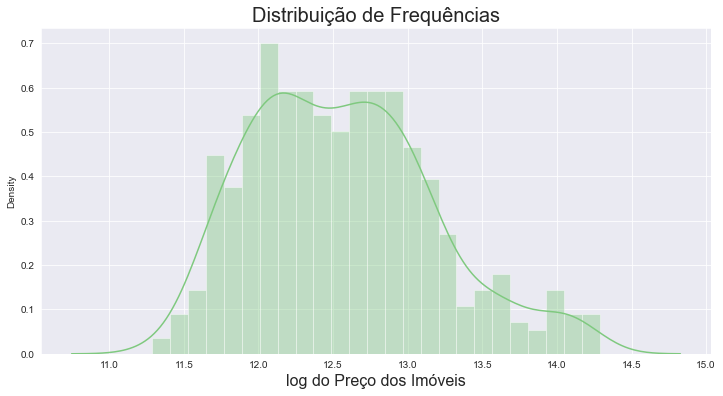

In [193]:
# vamos ver se foi possível se aproximar da distribuição normal 

ax = sns.distplot(dados_respeitando_area_minima['log_Valor'], bins = 25)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

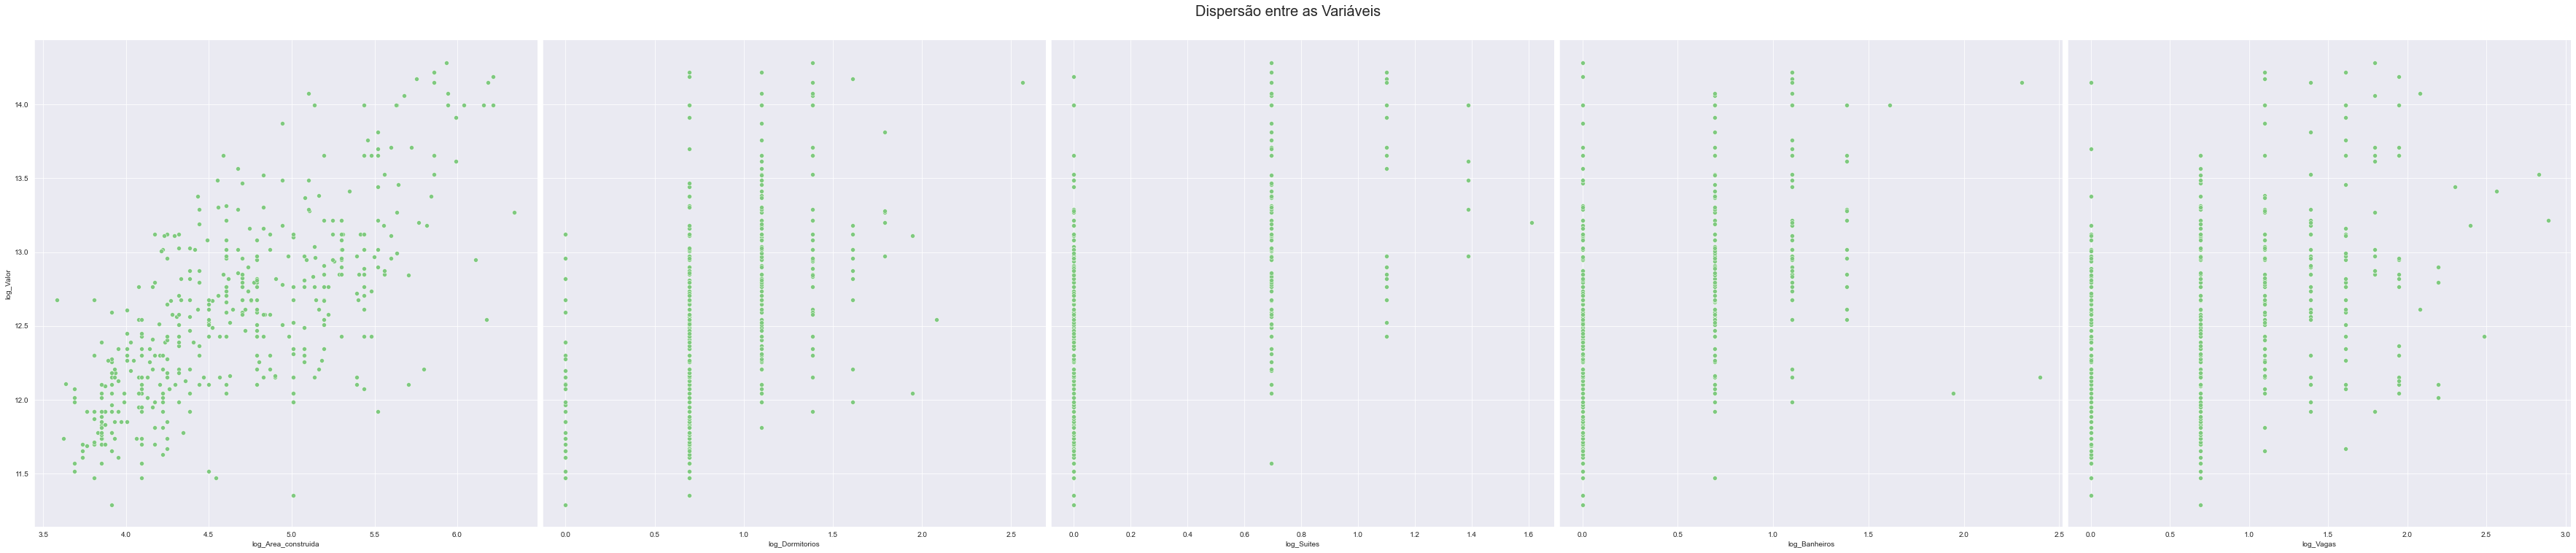

In [194]:
# Novamente, vamos analisar a dispersão entre as variáveis só que agora com as variáveis transformadas

ax = sns.pairplot(dados_respeitando_area_minima, y_vars= 'log_Valor', x_vars=['log_Area_construida','log_Dormitorios', 'log_Suites', 'log_Banheiros', 'log_Vagas'], height= 10)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y= 1.05)
ax


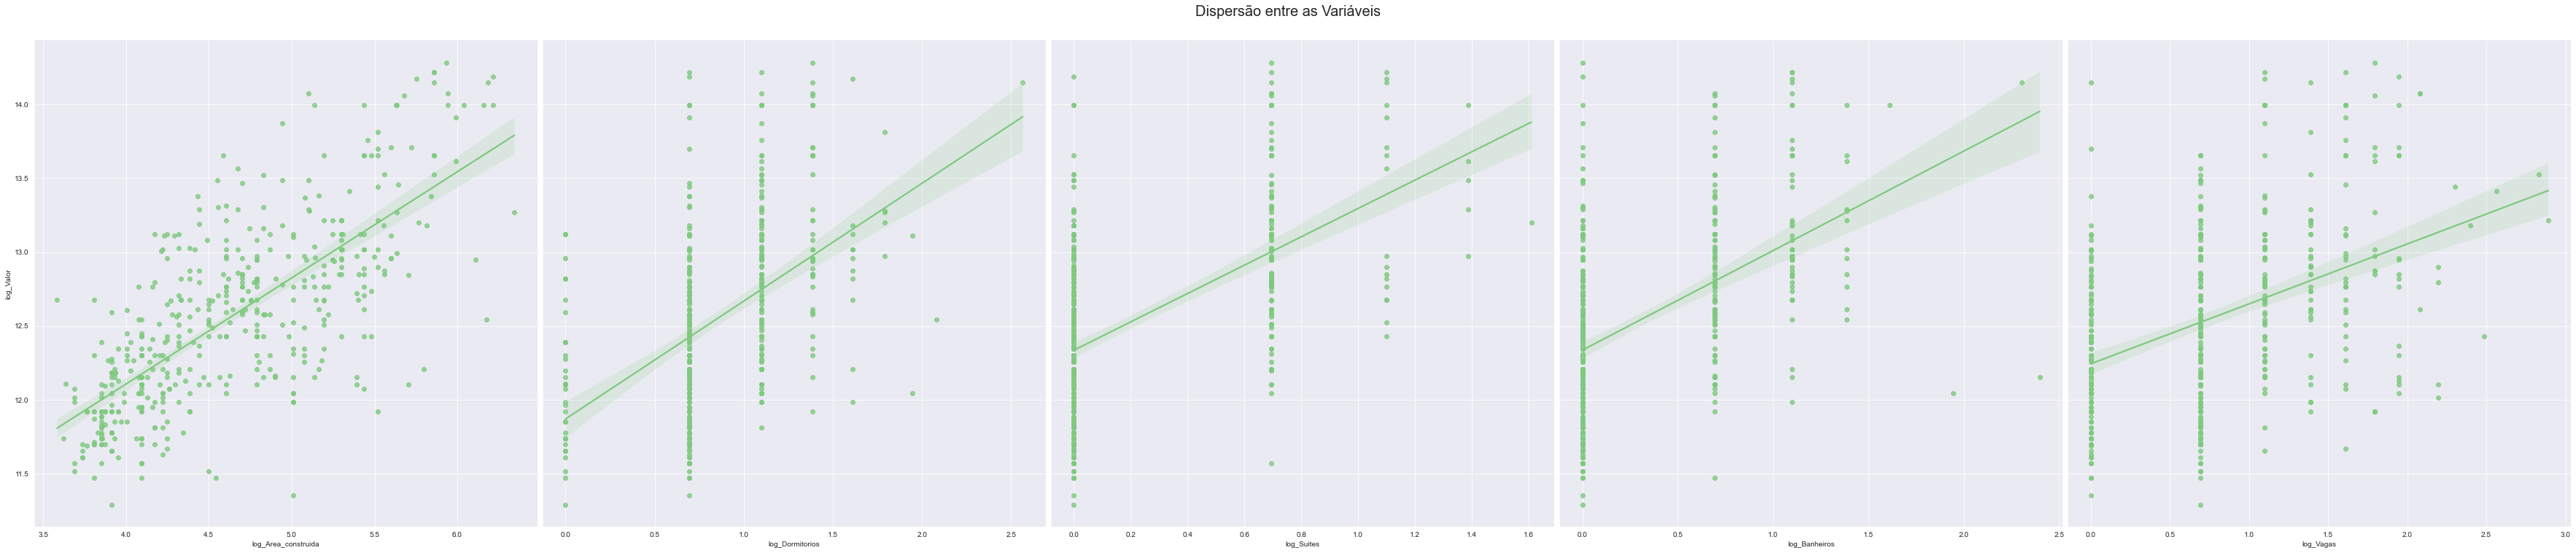

In [195]:

ax = sns.pairplot(dados_respeitando_area_minima, y_vars= 'log_Valor', x_vars=['log_Area_construida','log_Dormitorios', 'log_Suites', 'log_Banheiros', 'log_Vagas'], height= 10, kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y= 1.05)
ax


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'> Agora separaremos os dados em treino e teste, mas antes de fazer a estimação, devemos perceber quais variáveis não são boas de manter no modelo, pois ele pode ter ou não significancia para meu estudo.

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Treino:</b>
 Conforme podemos imaginar, dados de treino são os dados que serão apresentados ao algoritmo de machine learning para criação do modelo. Estes dados costumam representar cerca de 70% da totalidade dos dados.</p><br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Dados de Teste:</b>
Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho real seja verificado. Estes dados costumam representar cerca de 30% da totalidade dos dados.</p><br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Referência : https://didatica.tech/dados-de-treino-e-teste/</p>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [196]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [197]:
y = dados_respeitando_area_minima['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [198]:
X = dados_respeitando_area_minima[['log_Area_construida', 'log_Dormitorios', 'log_Suites', 'log_Banheiros', 'log_Vagas']]

## Criando os datasets de treino e de teste

In [199]:
# test_size indica o quanto % eu quero que ele pegue do conjunto de dados
# no caso, coloquei 0.2(20%) para teste e 0.8(80%) para treino
# random_state é só para setar o mesmo valor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p><br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Os <b>betas</b> são so coeficientes angulares parciais, os <b>X</b> são as variáveis explicativas, o  O <b>μi</b> é o termo de erro, que é o quanto da variação de y que não conseguiu ser explicada pela nossa equação.



<img width='800px' src="../img/./Log-linear.png">

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [200]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nos estimamos os modelos com constante( o intercepto), nesta biblioteca eu tenho que informar isso, colocar essa constante dentro do dataframe de variáveis explicativas que vou usar para gerar as estimativas. </p>


In [201]:
X_train_com_constante = sm.add_constant(X_train)

In [202]:
X_train

,log_Area_construida,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas
199,5.598422,1.945910,0.000000,1.098612,1.609438
201,4.787492,0.693147,0.000000,0.000000,0.693147
44,4.736198,0.693147,0.693147,0.000000,1.386294
70,4.787492,1.609438,1.098612,0.000000,1.945910
218,4.564348,0.693147,0.000000,0.000000,1.098612
...,...,...,...,...,...
347,3.912023,0.693147,0.000000,0.000000,0.000000
11,5.393628,1.791759,1.386294,1.098612,1.791759
101,4.219508,0.693147,0.000000,0.000000,0.693147
391,4.219508,1.098612,0.000000,0.000000,0.000000


In [203]:
X_train_com_constante

,const,log_Area_construida,log_Dormitorios,log_Suites,log_Banheiros,log_Vagas
199,1.0,5.598422,1.945910,0.000000,1.098612,1.609438
201,1.0,4.787492,0.693147,0.000000,0.000000,0.693147
44,1.0,4.736198,0.693147,0.693147,0.000000,1.386294
70,1.0,4.787492,1.609438,1.098612,0.000000,1.945910
218,1.0,4.564348,0.693147,0.000000,0.000000,1.098612
...,...,...,...,...,...,...
347,1.0,3.912023,0.693147,0.000000,0.000000,0.000000
11,1.0,5.393628,1.791759,1.386294,1.098612,1.791759
101,1.0,4.219508,0.693147,0.000000,0.000000,0.693147
391,1.0,4.219508,1.098612,0.000000,0.000000,0.000000


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Pesquisar, a algebra matricial por tras do modelo OLS( minimos quadrados ordinários), veremos que isso aqui é a forma como ele usa para estimar as matrizes e calcular o intercepto. Uma coluna com " 1 ". Por isso estamos fornecendo para o stats models.

In [204]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [205]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     87.07
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           1.63e-57
Time:                        00:12:03   Log-Likelihood:                -146.30
No. Observations:                 325   AIC:                             304.6
Df Residuals:                     319   BIC:                             327.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.0751    

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> O <b>teste F</b> é um teste que testa a significância dos parâmetros do modelo conjuntamente desses dados(coef) serem iguais a zero, ou seja, não fazem sentido, a regressão não faz sentido. Desta forma analisamos olhando para o teste f, o Prob (F-statistic). Para valores acima de 0.05, rejeitamos o modelo, ou seja, o modelo não é estatisticamente significante. <br> Para o nosso modelo, temos um valor menor que 0.05, ou seja, é significativo. <br>
Em <b>t</b> temos as estatíticas para cada variável(individual)  que eu coloquei no modelo, o  P>|t| é equivalenta ao Prob (F-statistic), então, 0.05 para baixo OK, acima de 0.05, esse parâmetro não é estatisticamente significativo. No meu caso, log_Dormitorios e log_Banheiros não apresentam um poder de explicação da variação da variável dependente. Vamos retirar essas variáveis do modelo.

<img width='600px' src="../img/./primeiro_teste.png">

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [206]:
# O y continua o mesmo, é nossa variável dependente

X = dados_respeitando_area_minima[['log_Area_construida', 'log_Suites', 'log_Vagas']]

## Criando os datasets de treino e de teste

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Estimando o modelo com o statsmodels

In [208]:
# adicionando a constante
X_train_com_constante = sm.add_constant(X_train)

In [209]:
X_train_com_constante

,const,log_Area_construida,log_Suites,log_Vagas
292,1.0,5.416100,0.000000,0.000000
329,1.0,3.761200,0.000000,0.000000
285,1.0,3.970292,0.000000,0.000000
128,1.0,4.499810,0.000000,0.693147
391,1.0,4.219508,0.000000,0.000000
...,...,...,...,...
7,1.0,4.499810,1.098612,1.098612
160,1.0,5.075174,0.000000,0.693147
106,1.0,5.598422,0.000000,1.098612
309,1.0,4.060443,0.000000,0.000000


In [210]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()

## Avaliando as estatísticas de teste do novo modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b> Teste de significância conjunta dos parâmetros :</b> Prob ( F-statistic) <= 0.05 (<b>OK</b>)<br>
<b> Teste de significância individual dos parâmetros :</b> P>|t| <= 0.05 (<b>OK</b>)

In [211]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 25 Apr 2022   Prob (F-statistic):           3.41e-76
Time:                        00:12:03   Log-Likelihood:                -165.25
No. Observations:                 372   AIC:                             338.5
Df Residuals:                     368   BIC:                             354.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.9431    

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> </b> Prob ( F-statistic) <= 0.05 (<b>OK</b>)<br>
</b> P>|t| <= 0.05 (<b>OK</b>)

<img width='600px' src="../img/./teste_2.png">

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [213]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [214]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> O R-quadrado está sempre entre 0 e 100%:</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> - 0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.</p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> - 100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>  Em geral, quanto maior o R-quadrado, melhor o modelo se ajusta aos seus dados. No entanto, existem condições importantes para esta diretriz.

In [215]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.616


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>Rascunho:</b> O que eu quero agora, é calcular um R² mas para o ajuste, para a previsão, agora vou prever os dados em cima dos dados de teste, e quero também calcular uma estatística que me diga se esse ajuste é bom ou não, vou utilizar um R² também mas primeiro preciso calcular o valor previsto.<br>
<p style='font-size: 25px; line-height: 2; margin: 10px 50px; text-align: justify;'> <b>Conceitos importantes:</b>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Underfitting</b> é uma tradução para o inglês de sub-ajustado. Ou seja, nosso modelo não conseguiu aprender suficiente sobre os dados. O underfitting leva à um erro elevado tanto nos dados de treino quando nos dados de teste.<br>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>Overfitting</b> é o oposto. O termo vem da tradução de sobre-ajustado. É quando o modelo aprende demais sobre os dados. Neste caso, o modelo mostra-se adequado <b>apenas para os dados de treino</b>, como se o modelo tivesse apenas <b>decorado</b> os dados de treino e não fosse capaz de generalizar para outros dados nunca vistos antes. Quando isso acontece, os dados de treino apresentam resultados excelentes, enquanto que a performance do modelo cai drasticamente com os dados de teste.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify;'>Referências:https://abracd.org/overfitting-e-underfitting-em-machine-learning/#:~:text=O%20underfitting%20leva%20%C3%A0%20um,aprende%20demais%20sobre%20os%20dados<br>https://youtu.be/IHAb3NHDahU

In [216]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [217]:
print('R² = %s' %metrics.r2_score(y_test,y_previsto).round(3))

R² = 0.615


<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>  O R² de teste deu bem próximo do R² de treino, isso é bom.

# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [218]:
entrada = X_test[0:1]
entrada

,log_Area_construida,log_Suites,log_Vagas
1,5.940171,1.386294,1.609438


## Gerando previsão pontual

In [219]:
modelo.predict(entrada)[0]

# presisamos converter pois transformamos os dados, esse valor obtido é em log

13.90396556335339

## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [220]:
np.exp(modelo.predict(entrada)[0])

1092485.0955628152

## Criando um simulador simples

In [221]:
# Agora criaremos um simulador 
Area = 60
Suites = 1
Vagas = 0
entrada = [[np.log(Area), np.log(Suites + 1), np.log(Vagas + 1)]]

print('R$ {0:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$ 246955.20


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>


## Por quê?

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Podemos perceber qual o efeito de variáveis individualmente, qual é mais significativa para o negócio, qual impacta mais o negócio negativamente ou positivamente. Então, essa ferramenta é boa para responder essas questões.<br>
    
## Obtendo o intercepto do modelo
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>


In [222]:
modelo.intercept_ # este e o log do parametro real

9.943093614621082

In [223]:
np.exp(modelo.intercept_) # este é o valor médio retirado todo o efeito das outras variáveis explicativas excluidas do modelo( caso elas sejam 0)

20808.016802312693

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$, $\beta_3$ e $\beta_4$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$, $\beta_3$ e $\beta_4$ medem as elasticidades de Y em relação a $X_2$, $X_3$ e $X_4$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$, $X_3$ e $X_4$.</p>

In [224]:
modelo.coef_

array([0.52034948, 0.4953905 , 0.1137974 ])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [225]:
X.columns

Index(['log_Area_construida', 'log_Suites', 'log_Vagas'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [226]:
index = ['Intercepto', 'Area_construida', 'Suites', 'Vagas']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [227]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])
#esta tudo em log

,Parâmetros
Intercepto,9.943094
Area_construida,0.520349
Suites,0.495391
Vagas,0.113797


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=X_4=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 17403.65</b> (exp[9.764]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Area_construida (m²)</b> → Mantendo-se o valor de $X_3$ (Suites) e $X_4$ (Vagas) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>0.556%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Suites</b> → Mantendo-se o valor de $X_2$ (Área) e $X_4$ (Área) constante  , um acréscimo de 1% nas suites gera, em média, um acréscimo de <b>0.433%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Vagas</b> → Mantendo-se o valor de $X_2$ (Área) e $X_3$ (Suites) constante  , um acréscimo de 1% nas vagas gera, em média, um acréscimo de <b>0.124%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [228]:
y_previsto_train = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

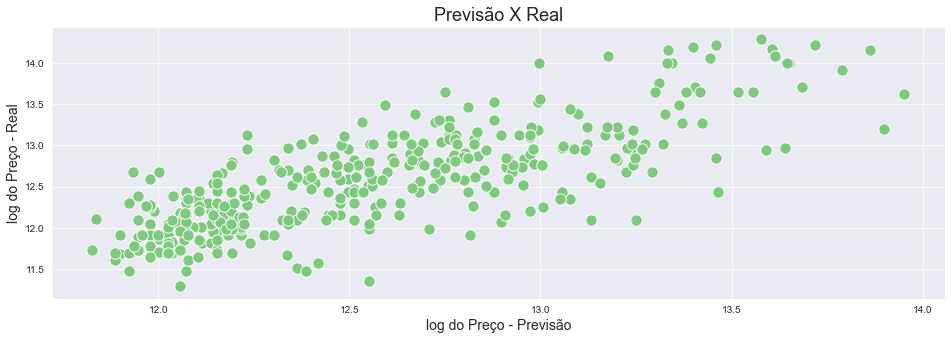

In [229]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train, s = 130, )
ax.figure.set_size_inches(16, 5)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Obtendo os resíduos

In [230]:
# A parte da previsão que não conseguiu ser explicada pelo nosso modelo, o mi

residuo = y_train - y_previsto_train # valor real menos valor previsto

## Gráfico de dispersão entre valor estimado e resíduos

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Método informal de verificação da hipótese de variância constante dos resíduos(homocedastidade). Isso é uma hipótese que é importante para um modelo de regressão linear, os resíduos tem que ter uma variação constante, por isso o nome <b>homocedasticidade</b>, pois as estatísticas que analisamos, as mais formais, precisam que isso seja atendido para que elas sejam válidas.

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='log do Preço - Previsão', ylabel='Resíduos'>

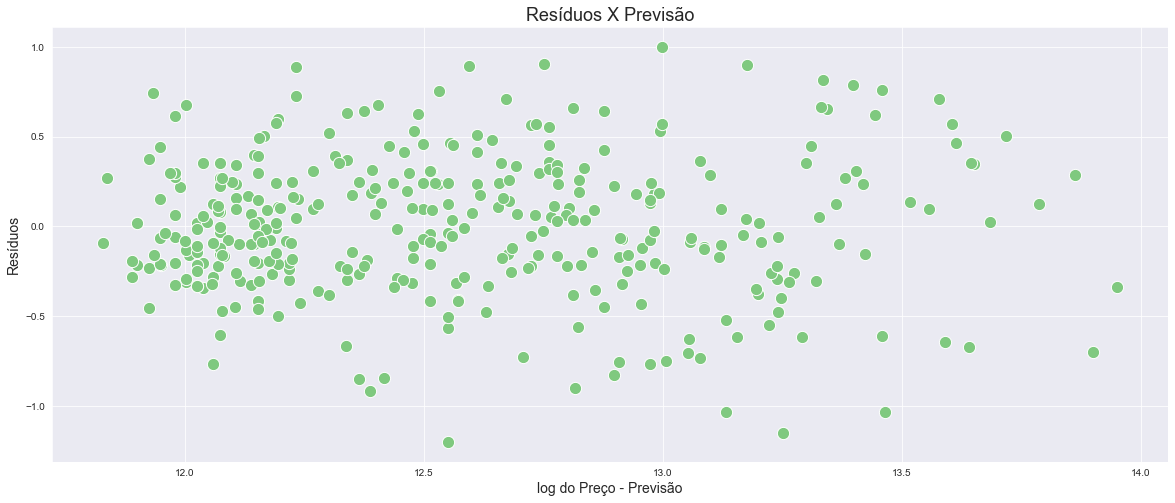

In [231]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo, s = 150)
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

## Utilizando os resíduos ao quadrado

<img width='800px' src="../img/./var_u.jpg">


Fonte: Econometria Básica - 5 edicão - Guajarti e Porter

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='log do Preço - Previsão', ylabel='Resíduos²'>

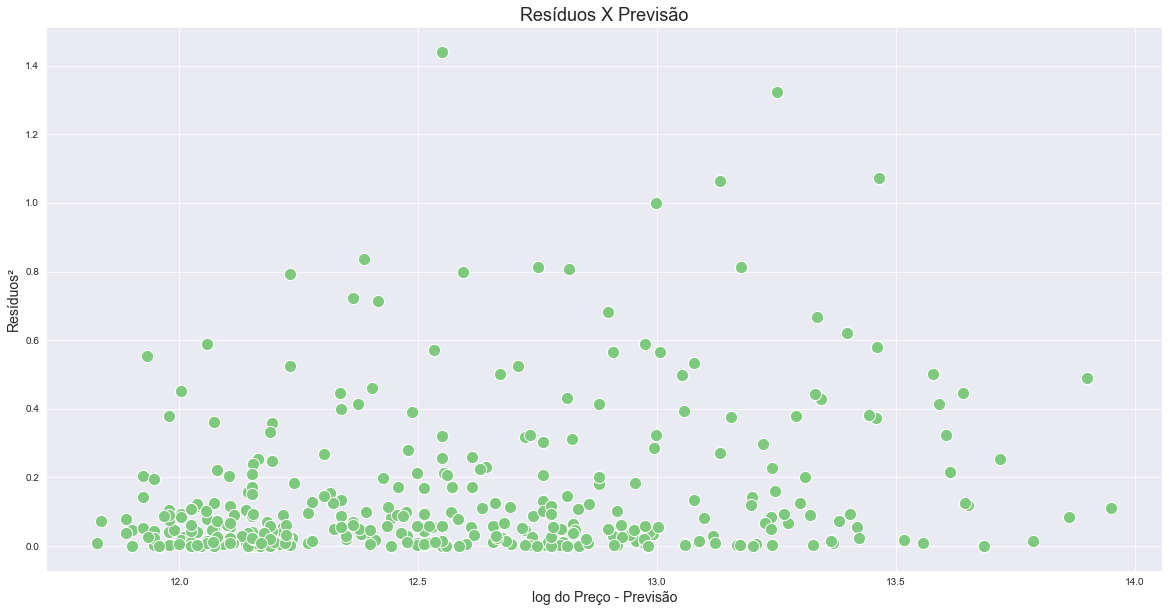

In [232]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2, s = 150)
ax.figure.set_size_inches(20,10)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'> Nessa observação, notamos que a variância dos resíduos não é constante, a mostra é pequena e talvez seja esse o problema. Com o tamanho da amostra aumentando, talvez consiga dissolver esse problema.

## Plotando a distribuição de frequências dos resíduos

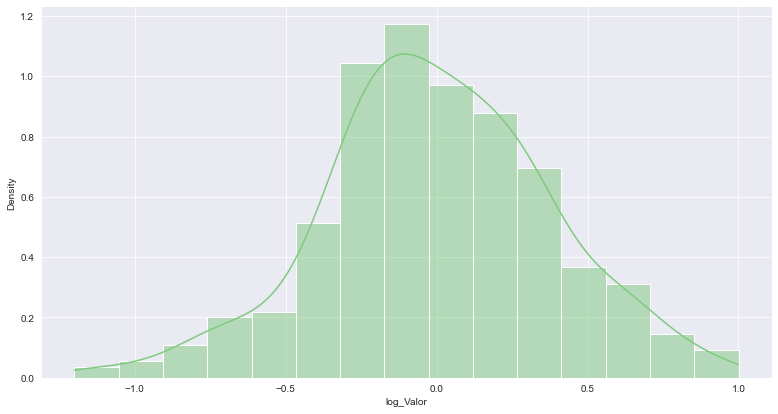

In [233]:
ax = sns.displot(data = residuo, bins = 15, kde = True, stat='density')
ax.figure.set_size_inches(12, 6)
ax